<a href="https://colab.research.google.com/github/keshavisha/Grow-Fitter-Health-Fitness/blob/master/Posture_Angle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the dependencies
import cv2
import mediapipe as mp
import time
import math as m
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_drawing_styles = mp.solutions.drawing_styles

**Function to Calculate the offset distance**

In [ ]:
def dist(x1, y1, x2, y2):
  dist = m.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return dist

**Function to calculate the body posture inclination**

In [ ]:
#Calculate the angle of body inclination
def Angle(x1, y1, x2, y2):
  theta = m.acos((y2 - y1)*(-y1) / (m.sqrt((x2 - x1)**2 + (y2 - y1)**2) * y1) )
  degree = int(180 / m.pi) * theta
  return degree

**Different Angles for a particular image**

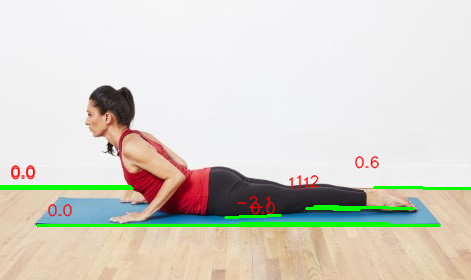

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# read image
img = cv2.imread("/content/yp1.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect edges
edges = cv2.Canny(gray, 50, 150)

# detect lines using Hough transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

# draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
    font_scale = 0.5
    font = cv2.FONT_HERSHEY_SIMPLEX

    if angle > 0:
      text_pos = (x1 - 20, y1- 20)
    else:
      text_pos = (x1 + 10, y1 -10)
    cv2.putText(img, str(round(angle, 1)), text_pos, font, font_scale, (0, 0, 255), 1, cv2.LINE_AA)
# cv2.putText(img, 'Angle: {}'.format(angle), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# display image
# cv2.imshow("image", img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


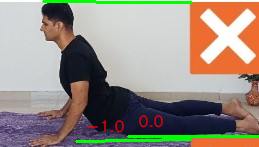

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# read image
img = cv2.imread("/content/wrongyp1.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect edges
edges = cv2.Canny(gray, 50, 150)

# detect lines using Hough transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

# draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
    font_scale = 0.5
    font = cv2.FONT_HERSHEY_SIMPLEX

    if angle > 0:
      text_pos = (x1 - 20, y1- 20)
    else:
      text_pos = (x1 + 10, y1 -10)
    cv2.putText(img, str(round(angle, 1)), text_pos, font, font_scale, (0, 0, 255), 1, cv2.LINE_AA)
# cv2.putText(img, 'Angle: {}'.format(angle), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# display image
# cv2.imshow("image", img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Load the two images
img1 = cv2.imread('/content/yp1.jpg')
img2 = cv2.imread('/content/wrongyp1.jpg')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection on the images
edges1 = cv2.Canny(gray1, 100, 200)
edges2 = cv2.Canny(gray2, 100, 200)

# Find the contours in the images
contours1, _ = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour in each image
cnt1 = max(contours1, key=cv2.contourArea)
cnt2 = max(contours2, key=cv2.contourArea)

# Fit a line to the contour points
[vx1,vy1,x1,y1] = cv2.fitLine(cnt1, cv2.DIST_L2, 0, 0.01, 0.01)
[vx2,vy2,x2,y2] = cv2.fitLine(cnt2, cv2.DIST_L2, 0, 0.01, 0.01)

# Calculate the angles of the lines
angle1 = np.arctan2(vy1, vx1) * 180 / np.pi
angle2 = np.arctan2(vy2, vx2) * 180 / np.pi

# Print the angles
print('Angle of image 1:', angle1)
print('Angle of image 2:', angle2)

# Compare the angles
if abs(angle1 - angle2) < 5:
    print('The angles are similar')
else:
    print('The angles are different')


Angle of image 1: [14.436362]
Angle of image 2: [-62.489326]
The angles are different


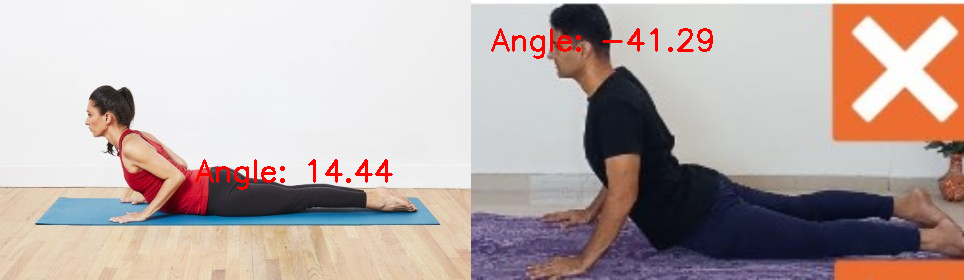

In [ ]:
import cv2
import numpy as np
# Load the two images
img1 = cv2.imread('/content/yp1.jpg')
img2 = cv2.imread('/content/wrongyp1.jpg')
# Resize the images to have the same height
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]
if h1 != h2:
  new_h = max(h1, h2)
img1 = cv2.resize(img1, (int(w1 * new_h / h1), new_h))
img2 = cv2.resize(img2, (int(w2 * new_h / h2), new_h))
# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Perform Canny edge detection on the images
edges1 = cv2.Canny(gray1, 100, 200)
edges2 = cv2.Canny(gray2, 100, 200)
# Find the contours in the images
contours1, _ = cv2.findContours(edges1, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
# Find the largest contour in each image
cnt1 = max(contours1, key=cv2.contourArea)
cnt2 = max(contours2, key=cv2.contourArea)
# Fit a line to the contour points
[vx1, vy1, x1, y1] = cv2.fitLine(cnt1, cv2.DIST_L2, 0, 0.01, 0.01)
[vx2, vy2, x2, y2] = cv2.fitLine(cnt2, cv2.DIST_L2, 0, 0.01, 0.01)
# Calculate the angles of the lines
angle1 = np.arctan2(vy1, vx1) * 180 / np.pi
angle2 = np.arctan2(vy2, vx2) * 180 / np.pi
angle1 = float(angle1)
angle2 = float(angle2)
# Concatenate the two images horizontally
concat_img = np.concatenate((img1, img2), axis=1)
# Display the angles on the concatenated image
# Convert the angles to string format
angle1_str = 'Angle: ' + str(round(angle1, 2))
angle2_str = 'Angle: ' + str(round(angle2, 2))
# Display the angles on the concatenated image
cv2.putText(concat_img, angle1_str, (int(x1)+20, int(y1)+20),
cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.putText(concat_img, angle2_str, (img1.shape[1]+20, 50),
cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
from google.colab.patches import cv2_imshow
# Display the concatenated image
cv2_imshow(concat_img)
cv2.waitKey(0)
cv2.destroyAllWindows()